# Handwritten Digit Classification Using Neural Networks


In this project, I am building a neural network to classify handwritten digits from the MNIST dataset, which is a widely-used benchmark in machine learning. The dataset contains 28x28 grayscale images of digits (0–9), and my goal is to correctly identify the digit in each image.

I preprocess the images by normalizing the pixel values to a range of 0 to 1. Then, using TensorFlow and Keras, I create a neural network model with a flattening layer, followed by a fully connected hidden layer and an output layer with 10 neurons, corresponding to the 10 possible digit classes. I train the model using the Adam optimizer and the sparse categorical crossentropy loss function. Finally, I evaluate the model’s performance on the test data and generate a confusion matrix to visualize the classification results.

This project demonstrates how neural networks can be applied to image classification tasks with a simple architecture, and it achieves high accuracy in recognizing handwritten digits.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape #each individual sample

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

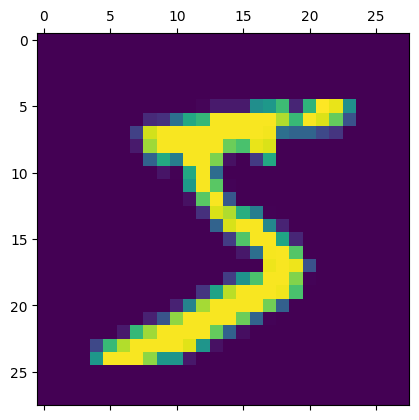

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_train_flattend.shape

(60000, 784)

In [14]:
X_test_flattend = X_test.reshape(len(X_test),28*28)
X_test_flattend.shape

(10000, 784)

In [15]:
X_train_flattend[0] #now it is single dimention array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model = keras.Sequential([
    keras.layers.Flatten (input_shape=(28,28)), #now we dont need to make flatten array
    keras.layers.Dense(1000, input_shape=(784,),activation='sigmoid'),
     keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer = 'adam',
               loss ='sparse_categorical_crossentropy',
               metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs=20)

c:\Users\souri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\souri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8586 - loss: 0.4970
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9451 - loss: 0.1827
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9688 - loss: 0.1057
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9791 - loss: 0.0702
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9847 - loss: 0.0516
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9889 - loss: 0.0368
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9929 - loss: 0.0241
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9954 - loss: 0.0171
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9966 - loss: 0.0128
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9979 - loss: 0.0090
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9982 - loss: 0.0067
Epoch 12/20
1875/1875 ━━━━━━━

In [17]:
model.evaluate(X_test,y_test)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9794 - loss: 0.1007


[0.08283650875091553, 0.9829999804496765]

In [18]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.7762998e-06, 1.6891201e-08, 1.7292898e-04, 6.3604099e-01,
       5.9364590e-11, 1.3893750e-06, 5.1520975e-12, 9.9999994e-01,
       9.3241779e-06, 3.3255958e-04], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_test[0]

7

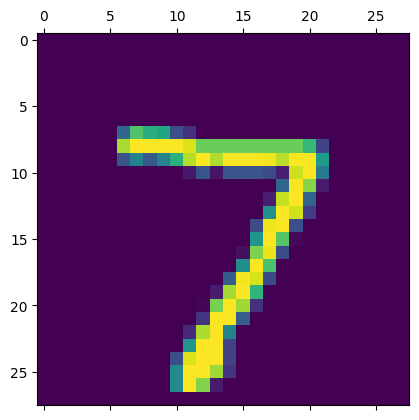

In [21]:
plt.matshow(X_test[0])

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [23]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    1,    0,    2,    1,    2,    0],
       [   0, 1126,    1,    2,    0,    1,    2,    1,    2,    0],
       [   4,    2, 1000,    6,    1,    0,    3,    4,   11,    1],
       [   0,    0,    0,  998,    0,    4,    0,    1,    3,    4],
       [   2,    0,    2,    1,  968,    0,    2,    0,    0,    7],
       [   2,    0,    0,    8,    0,  878,    2,    0,    1,    1],
       [   4,    2,    1,    1,    4,   10,  935,    0,    1,    0],
       [   2,    2,    6,    1,    0,    0,    0, 1011,    3,    3],
       [   0,    0,    1,    4,    4,    1,    0,    3,  957,    4],
       [   2,    2,    0,    3,    7,    6,    0,    4,    1,  984]])>

Text(95.72222222222221, 0.5, 'Truth')

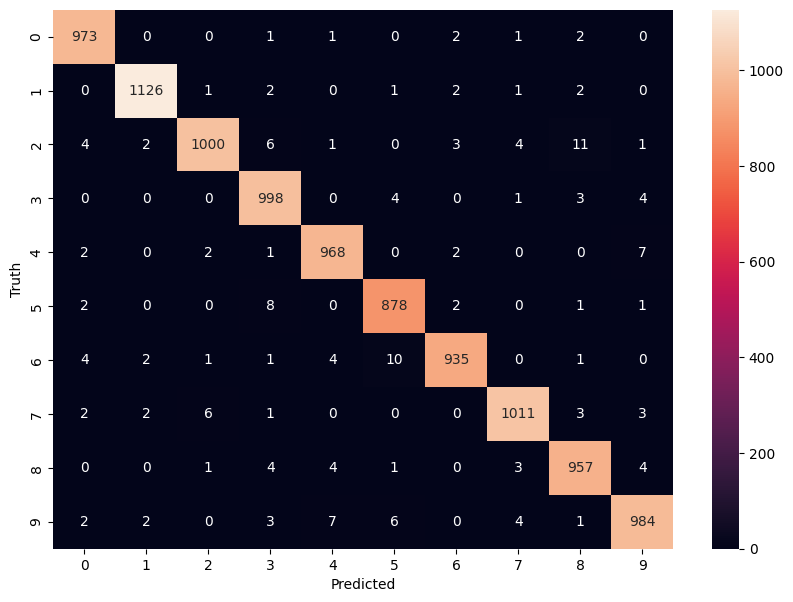

In [25]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap (cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')